In [62]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [63]:
df = pd.read_csv("EasyVisa.csv")
df.shape

(25480, 12)

### Checking NULL

In [64]:
null_cols = [col for col in df.columns if df[col].isnull().sum() >= 1]
null_cols

[]

There are no null valued column

### checking duplicate

In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [67]:
df.drop('case_id', axis=1, inplace= True)
df.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West         592.2029   
1             2412         2002            Northeast       83425.6500   
2            44444         2008                 West      122996.8600   
3               98         1897                 West       83434.0300   
4             1082         2005                South      149907.3900   

  unit_of_wage full_time_position case_status  
0         Hour                  Y      Denied  
1         Year                  Y   Certified  
2         Year                  Y      Denied  
3         Year                  Y      Denied  
4         Year                  Y   Certified

## Feature Engineering

In [68]:
from datetime import date 
current_year = date.today().year
current_year

2025

In [69]:
df['company_age'] = current_year - df['yr_of_estab']
df.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West         592.2029   
1             2412         2002            Northeast       83425.6500   
2            44444         2008                 West      122996.8600   
3               98         1897                 West       83434.0300   
4             1082         2005                South      149907.3900   

  unit_of_wage full_time_position case_status  company_age  
0         Hour                  Y      Denied           18  
1         Year                  Y   Certified           23  
2         Year                  Y      Denied           17  
3         Year                  Y      Denied          128  
4         Year                  Y   Certified           20

In [70]:
df.drop('yr_of_estab', axis= 1, inplace= True)
df.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees region_of_employment  prevailing_wage unit_of_wage  \
0            14513                 West         592.2029         Hour   
1             2412            Northeast       83425.6500         Year   
2            44444                 West      122996.8600         Year   
3               98                 West       83434.0300         Year   
4             1082                South      149907.3900         Year   

  full_time_position case_status  company_age  
0                  Y      Denied           18  
1                  Y   Certified           23  
2                  Y      Denied           17  
3                  Y      Denied          128  
4                  Y   Certified           20

In [71]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
num_features, cat_features

(['no_of_employees', 'prevailing_wage', 'company_age'],
 ['continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'])

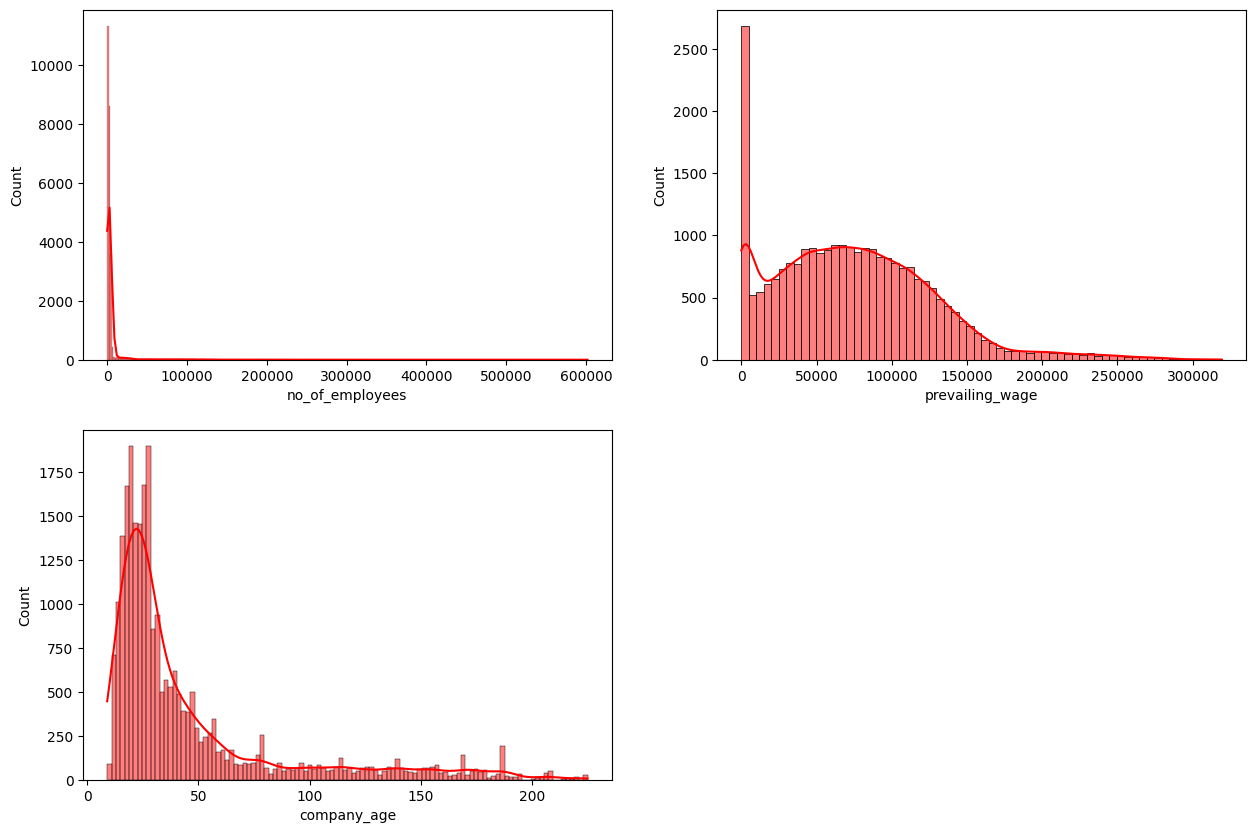

In [72]:
plt.figure(figsize= (15, 10))
for i, col in enumerate(num_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x= df[col], kde= True, color= 'red')
    plt.xlabel(col)
plt.show()

In [73]:
X = df.drop('case_status',axis= 1)
y = df.case_status
X

continent education_of_employee has_job_experience  \
0          Asia           High School                  N   
1          Asia              Master's                  Y   
2          Asia            Bachelor's                  N   
3          Asia            Bachelor's                  N   
4        Africa              Master's                  Y   
...         ...                   ...                ...   
25475      Asia            Bachelor's                  Y   
25476      Asia           High School                  Y   
25477      Asia              Master's                  Y   
25478      Asia              Master's                  Y   
25479      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees region_of_employment  \
0                         N            14513                 West   
1                         N             2412            Northeast   
2                         Y            44444                 West   
3                         N               98                 West   
4                         N             1082                South   
...                     ...              ...                  ...   
25475                     Y             2601                South   
25476                     N             3274            Northeast   
25477                     N             1121                South   
25478                     Y             1918                 West   
25479                     N             3195              Midwest   

       prevailing_wage unit_of_wage full_time_position  company_age  
0             592.2029         Hour                  Y           18  
1           83425.6500         Year                  Y           23  
2          122996.8600         Year                  Y           17  
3           83434.0300         Year                  Y          128  
4          149907.3900         Year                  Y           20  
...                ...          ...                ...          ...  
25475       77092.5700         Year                  Y           17  
25476      279174.7900         Year                  Y           19  
25477      146298.8500         Year                  N          115  
25478       86154.7700         Year                  Y          138  
25479       70876.9100         Year                  Y           65  

[25480 rows x 10 columns]

In [74]:
y

0           Denied
1        Certified
2           Denied
3           Denied
4        Certified
           ...    
25475    Certified
25476    Certified
25477    Certified
25478    Certified
25479    Certified
Name: case_status, Length: 25480, dtype: object

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_tes = train_test_split(X, y, test_size= 0.2, random_state= 22)
X_train.shape, X_test.shape

((20384, 10), (5096, 10))

In [76]:
for feature in cat_features:
    print(f"{feature}: {df[feature].nunique()}")

continent: 6
education_of_employee: 4
has_job_experience: 2
requires_job_training: 2
region_of_employment: 5
unit_of_wage: 4
full_time_position: 2
case_status: 2


In [77]:
oh_encoding = ['continent', 'region_of_employment', 'unit_of_wage']
or_encoding = ['education_of_employee', 'has_job_experience', 'requires_job_training', 'full_time_position']

In [78]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps=[
    ("power", PowerTransformer(method= 'yeo-johnson')),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers= [
        ("num_transform", num_transformer, num_features),
        ("onehot", OneHotEncoder(handle_unknown='ignore', drop= 'first'), oh_encoding),
        ("oridinal", OrdinalEncoder(), or_encoding)
    ]
)

In [79]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [80]:
X_train_transformed

array([[-0.59136749, -0.0071468 , -0.84739991, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.04425497, -1.98619861, -0.117872  , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.32989528, -0.57556099, -0.18020232, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.24642962,  0.50796212,  1.22817046, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.02704659, -1.65535327,  1.21589782, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.45946673, -0.46307694, -0.18020232, ...,  1.        ,
         0.        ,  1.        ]], shape=(20384, 19))

In [81]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy= 'minority', random_state= 22)
X_train_resamp, y_train_resamp = smt.fit_resample(X_train_transformed, y_train)

In [82]:
y_train.value_counts(), y_train_resamp.value_counts()

(case_status
 Certified    13640
 Denied        6744
 Name: count, dtype: int64,
 case_status
 Denied       7503
 Certified    6402
 Name: count, dtype: int64)

In [83]:
X_train_resamp.shape, y_train_resamp.shape

((13905, 19), (13905,))

In [89]:
y_train_resamp

0        Certified
1        Certified
2        Certified
3        Certified
4        Certified
           ...    
13900       Denied
13901       Denied
13902       Denied
13903       Denied
13904       Denied
Name: case_status, Length: 13905, dtype: object

In [84]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score, roc_auc_score, roc_curve


In [85]:
def evaluate_scores(true, predict):
    acc = accuracy_score(true, predict)
    preci_score = precision_score(true, predict)
    f1 = f1_score(true, predict)
    roc = roc_auc_score(true, predict)
    recall = recall_score(true, predict)

    return acc, f1, preci_score,recall, roc 

In [86]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [94]:
def evaluate_models(X_train, X_test, y_train, y_test, models):
    model_list = []
    accuracy_list = []
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        tr_acc, tr_f1, tr_preci, tr_recall, tr_aoc = evaluate_scores(y_train, y_train_pred)
        te_acc, te_f1, te_preci, te_recall, te_aoc = evaluate_scores(y_test, y_test_pred)

        model_list.append(list(models.keys())[i])
        accuracy_list.append(te_acc)

        print(list(models.keys())[i])
        print("model performance for train data")
        print(f"accuracy_score: {tr_acc}")
        print(f"f1_score: {tr_f1}")
        print(f"precision_scre: {tr_preci}")
        print(f"recall_score: {tr_recall}")
        print(f"roc_aoc_score: {tr_aoc}")
        print("---------------------------------")
        print("model performance for test data")
        print(f"accuracy_score: {te_acc}")
        print(f"f1_score: {te_f1}")
        print(f"precision_scre: {te_preci}")
        print(f"recall_score: {te_recall}")
        print(f"roc_aoc_score: {te_aoc}")
        print("###################################")

    report = pd.DataFrame(data= zip(model_list, accuracy_list), columns= ['Model', 'Accuracy']).sort_values(by= ['Accuracy'], ascending= False)
    return report


In [95]:
from sklearn.preprocessing import LabelEncoder
lblen = LabelEncoder()
y_train_resamp = lblen.fit_transform(y_train_resamp)
y_tes = lblen.transform(y_tes)

In [91]:
y_train_resamp

array([0, 0, 0, ..., 1, 1, 1], shape=(13905,))

In [92]:
y_tes

array([0, 0, 1, ..., 1, 0, 0], shape=(5096,))

In [96]:
test_report = evaluate_models(X_train_resamp, X_test_transformed, y_train_resamp, y_tes, models)

Random Forest
model performance for train data
accuracy_score: 1.0
f1_score: 1.0
precision_scre: 1.0
recall_score: 1.0
roc_aoc_score: 1.0
---------------------------------
model performance for test data
accuracy_score: 0.6983908948194663
f1_score: 0.6055940467025918
precision_scre: 0.541532813217072
recall_score: 0.6868451688009313
roc_aoc_score: 0.6955540231216024
###################################
Decision Tree
model performance for train data
accuracy_score: 1.0
f1_score: 1.0
precision_scre: 1.0
recall_score: 1.0
roc_aoc_score: 1.0
---------------------------------
model performance for test data
accuracy_score: 0.6803375196232339
f1_score: 0.5876993166287016
precision_scre: 0.5199283475145544
recall_score: 0.6757857974388825
roc_aoc_score: 0.6792191272570374
###################################
Gradient Boosting
model performance for train data
accuracy_score: 0.8844300611290903
f1_score: 0.8923571572107978
precision_scre: 0.8969835712361971
recall_score: 0.8877782220445155
roc_ao

In [97]:
test_report

Model  Accuracy
6     CatBoosting Classifier  0.704082
5              XGBClassifier  0.700353
0              Random Forest  0.698391
7  Support Vector Classifier  0.696036
2          Gradient Boosting  0.690149
8        AdaBoost Classifier  0.684851
1              Decision Tree  0.680338
4     K-Neighbors Classifier  0.660518
3        Logistic Regression  0.610675

In [112]:
catboost_params_focused = {
    'iterations': [200, 300, 500],
    'learning_rate': [0.03, 0.05, 0.1],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [3, 5, 7],
    'bagging_temperature': [0.5, 1],
    'random_strength': [1, 2],
    'min_data_in_leaf': [5, 10, 20]
}

xgboost_params_focused = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 7, 9],
    'min_child_weight': [3, 5],
    'gamma': [0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'reg_alpha': [0.01, 0.1],
    'reg_lambda': [0.1, 1]
}

random_forest_params_focused = {
    'n_estimators': [200, 300, 500],
    'max_depth': [20, 30, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 0.5],
    'class_weight': ['balanced', None]
}

In [114]:
randomcv_models = [
    ('Catboost', CatBoostClassifier(), catboost_params_focused),
    ('xgboost', XGBClassifier(), xgboost_params_focused),
    ('randomforest', RandomForestClassifier(), random_forest_params_focused)
]

In [115]:
from sklearn.model_selection import RandomizedSearchCV
best_params = {}
for name, model, params in randomcv_models:
    randomcv = RandomizedSearchCV(
        estimator= model,
        param_distributions= params,
        n_iter= 100,
        cv= 3,
        verbose= 2,
        n_jobs= -1
    )
    randomcv.fit(X_train_resamp, y_train_resamp)
    best_params[name] = randomcv.best_params_
for model_name in best_params:
    print(f"best paramrs for {model_name} -> {best_params[model_name]}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
0:	learn: 0.5935028	total: 68.5ms	remaining: 34.2s
0:	learn: 0.5994158	total: 68.5ms	remaining: 34.2s
0:	learn: 0.5978127	total: 69.4ms	remaining: 34.6s
0:	learn: 0.6643465	total: 70.1ms	remaining: 21s
0:	learn: 0.6609331	total: 71.4ms	remaining: 14.2s
0:	learn: 0.6596801	total: 71.9ms	remaining: 14.3s
0:	learn: 0.6619872	total: 70.9ms	remaining: 14.1s
0:	learn: 0.5945929	total: 85.6ms	remaining: 17s
1:	learn: 0.6401001	total: 83.9ms	remaining: 12.5s
1:	learn: 0.6320605	total: 85.1ms	remaining: 8.43s
1:	learn: 0.6314021	total: 84.8ms	remaining: 8.39s
1:	learn: 0.6298824	total: 89.4ms	remaining: 8.85s
2:	learn: 0.6166691	total: 88.5ms	remaining: 8.76s
2:	learn: 0.6028540	total: 90.4ms	remaining: 5.94s
1:	learn: 0.5251417	total: 99.4ms	remaining: 24.8s
1:	learn: 0.5218625	total: 99.8ms	remaining: 24.8s
2:	learn: 0.6051687	total: 95.7ms	remaining: 6.29s
0:	learn: 0.6681609	total: 98.7ms	remaining: 29.5s
3:	learn: 0.5940183	tot

In [116]:
best_params

{'Catboost': {'random_strength': 1,
  'min_data_in_leaf': 20,
  'learning_rate': 0.1,
  'l2_leaf_reg': 3,
  'iterations': 500,
  'depth': 10,
  'bagging_temperature': 0.5},
 'xgboost': {'subsample': 0.8,
  'reg_lambda': 1,
  'reg_alpha': 0.01,
  'n_estimators': 500,
  'min_child_weight': 3,
  'max_depth': 9,
  'learning_rate': 0.1,
  'gamma': 0.1,
  'colsample_bytree': 0.8},
 'randomforest': {'n_estimators': 500,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_features': 0.5,
  'max_depth': None,
  'class_weight': None}}

In [117]:
best_models = {
    "Catboost": CatBoostClassifier(**best_params['Catboost']),
    "xgboost": XGBClassifier(**best_params['xgboost']),
    "randomforest": RandomForestClassifier(**best_params['randomforest'])
}

In [119]:
tuned_report = evaluate_models(X_train= X_train_resamp, X_test= X_test_transformed, y_train= y_train_resamp, y_test= y_tes, models= best_models)

0:	learn: 0.5890849	total: 12.3ms	remaining: 6.15s
1:	learn: 0.5053693	total: 20.7ms	remaining: 5.15s
2:	learn: 0.4427979	total: 29.8ms	remaining: 4.93s
3:	learn: 0.3998881	total: 38.1ms	remaining: 4.72s
4:	learn: 0.3652980	total: 45.8ms	remaining: 4.54s
5:	learn: 0.3380727	total: 53.9ms	remaining: 4.44s
6:	learn: 0.3220898	total: 62.9ms	remaining: 4.43s
7:	learn: 0.3075831	total: 94.9ms	remaining: 5.84s
8:	learn: 0.2980190	total: 108ms	remaining: 5.88s
9:	learn: 0.2900761	total: 121ms	remaining: 5.93s
10:	learn: 0.2831324	total: 128ms	remaining: 5.7s
11:	learn: 0.2767153	total: 136ms	remaining: 5.53s
12:	learn: 0.2706312	total: 143ms	remaining: 5.37s
13:	learn: 0.2648495	total: 151ms	remaining: 5.22s
14:	learn: 0.2607538	total: 158ms	remaining: 5.09s
15:	learn: 0.2560318	total: 165ms	remaining: 4.98s
16:	learn: 0.2511539	total: 172ms	remaining: 4.89s
17:	learn: 0.2469584	total: 180ms	remaining: 4.81s
18:	learn: 0.2446193	total: 187ms	remaining: 4.73s
19:	learn: 0.2402560	total: 194ms	

In [120]:
tuned_report

Model  Accuracy
1       xgboost  0.699176
0      Catboost  0.697410
2  randomforest  0.693878

## Diagnostic Analysis - Why is accuracy only 70%?

In [98]:
# Check class distribution
print("Original target distribution:")
print(y.value_counts())
print("\nOriginal target percentage:")
print(y.value_counts(normalize=True) * 100)

Original target distribution:
case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

Original target percentage:
case_status
Certified    66.789639
Denied       33.210361
Name: proportion, dtype: float64


In [99]:
# Check data quality issues
print("Dataset shape:", df.shape)
print("\nFeature types:")
print(f"Numerical features: {len(num_features)}")
print(f"Categorical features: {len(cat_features)}")
print("\nCategorical feature cardinality:")
for feat in cat_features:
    print(f"{feat}: {df[feat].nunique()} unique values")

Dataset shape: (25480, 11)

Feature types:
Numerical features: 3
Categorical features: 8

Categorical feature cardinality:
continent: 6 unique values
education_of_employee: 4 unique values
has_job_experience: 2 unique values
requires_job_training: 2 unique values
region_of_employment: 5 unique values
unit_of_wage: 4 unique values
full_time_position: 2 unique values
case_status: 2 unique values


In [100]:
# Check if there's a typo in test variable
print("y_test variable name issue:")
print("y_tes shape:", y_tes.shape)
print("\nThis is a BUG - variable should be y_test not y_tes!")

y_test variable name issue:
y_tes shape: (5096,)

This is a BUG - variable should be y_test not y_tes!


In [102]:
# Check feature correlations with target (only numerical features)
X_temp_num = X[num_features].copy()
y_encoded = (y == 'Certified').astype(int)
X_temp_num['case_status'] = y_encoded
correlation_with_target = X_temp_num.corr()['case_status'].sort_values(ascending=False)
print("Numerical Feature correlations with target:")
print(correlation_with_target)

Numerical Feature correlations with target:
case_status        1.000000
prevailing_wage    0.076198
no_of_employees    0.008677
company_age       -0.008597
Name: case_status, dtype: float64


### Key Issues Identified:

1. **CRITICAL BUG**: Variable name typo `y_tes` instead of `y_test` in train_test_split
2. **Very weak correlations**: Numerical features have correlations < 0.08 with target
3. **Limited feature engineering**: Only created 1 new feature (company_age)
4. **Class imbalance**: 67% Certified vs 33% Denied (handled with SMOTEENN)
5. **Missing feature interactions**: No polynomial or interaction features
6. **Encoding issues**: May need better encoding strategies
7. **No feature selection**: Using all features without analyzing importance
8. **Outliers not handled**: PowerTransformer applied but outliers not investigated

## Optimization Steps (Before Hyperparameter Tuning)

### Step 1: Fix the typo bug and create additional features

In [103]:
# Reload and re-engineer features with more sophisticated approach
df_optimized = pd.read_csv("EasyVisa.csv")
df_optimized.drop('case_id', axis=1, inplace=True)

# Feature Engineering - Create more meaningful features
current_year = date.today().year
df_optimized['company_age'] = current_year - df_optimized['yr_of_estab']

# Additional feature engineering
# 1. Log transform for wage (handle skewness better)
df_optimized['log_wage'] = np.log1p(df_optimized['prevailing_wage'])

# 2. Wage per employee ratio
df_optimized['wage_per_employee'] = df_optimized['prevailing_wage'] / (df_optimized['no_of_employees'] + 1)

# 3. Categorize company age into bins
df_optimized['company_age_category'] = pd.cut(df_optimized['company_age'], 
                                                bins=[0, 10, 25, 50, 100, 200],
                                                labels=['very_new', 'new', 'established', 'mature', 'very_old'])

# 4. Categorize company size
df_optimized['company_size'] = pd.cut(df_optimized['no_of_employees'],
                                       bins=[0, 50, 500, 5000, 50000, float('inf')],
                                       labels=['micro', 'small', 'medium', 'large', 'very_large'])

# 5. High wage indicator (above median)
median_wage = df_optimized['prevailing_wage'].median()
df_optimized['high_wage'] = (df_optimized['prevailing_wage'] > median_wage).astype(int)

# Drop original yr_of_estab
df_optimized.drop('yr_of_estab', axis=1, inplace=True)

print("New dataset shape:", df_optimized.shape)
print("\nNew features created:")
print(df_optimized.columns.tolist())
df_optimized.head()

New dataset shape: (25480, 16)

New features created:
['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'no_of_employees', 'region_of_employment', 'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status', 'company_age', 'log_wage', 'wage_per_employee', 'company_age_category', 'company_size', 'high_wage']


continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees region_of_employment  prevailing_wage unit_of_wage  \
0            14513                 West         592.2029         Hour   
1             2412            Northeast       83425.6500         Year   
2            44444                 West      122996.8600         Year   
3               98                 West       83434.0300         Year   
4             1082                South      149907.3900         Year   

  full_time_position case_status  company_age   log_wage  wage_per_employee  \
0                  Y      Denied           18   6.385536           0.040802   
1                  Y   Certified           23  11.331723          34.573415   
2                  Y      Denied           17  11.719922           2.767395   
3                  Y      Denied          128  11.331824         842.767980   
4                  Y   Certified           20  11.917780         138.418643   

  company_age_category company_size  high_wage  
0                  new        large          0  
1                  new       medium          1  
2                  new        large          1  
3             very_old        small          1  
4                  new       medium          1

In [104]:
# Split features and target
X_opt = df_optimized.drop('case_status', axis=1)
y_opt = df_optimized['case_status']

# Identify feature types
num_features_opt = ['no_of_employees', 'prevailing_wage', 'company_age', 'log_wage', 'wage_per_employee', 'high_wage']
cat_features_opt = [col for col in X_opt.columns if col not in num_features_opt]

print("Numerical features:", num_features_opt)
print("Categorical features:", cat_features_opt)

Numerical features: ['no_of_employees', 'prevailing_wage', 'company_age', 'log_wage', 'wage_per_employee', 'high_wage']
Categorical features: ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'company_age_category', 'company_size']


In [105]:
# FIX THE BUG: Correct variable name for y_test
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y_opt, test_size=0.2, random_state=22, stratify=y_opt)
print("Train shape:", X_train_opt.shape)
print("Test shape:", X_test_opt.shape)
print("\nTarget distribution in train:")
print(y_train_opt.value_counts())
print("\nTarget distribution in test:")
print(y_test_opt.value_counts())

Train shape: (20384, 15)
Test shape: (5096, 15)

Target distribution in train:
case_status
Certified    13614
Denied        6770
Name: count, dtype: int64

Target distribution in test:
case_status
Certified    3404
Denied       1692
Name: count, dtype: int64


### Step 2: Improved preprocessing pipeline with outlier handling

In [106]:
from sklearn.preprocessing import RobustScaler

# Better preprocessing with RobustScaler (handles outliers better than StandardScaler)
num_transformer_opt = Pipeline(steps=[
    ("scaler", RobustScaler())  # More robust to outliers than StandardScaler
])

# Separate encoding strategies
oh_encoding_opt = ['continent', 'region_of_employment', 'unit_of_wage', 'company_age_category', 'company_size']
or_encoding_opt = ['education_of_employee', 'has_job_experience', 'requires_job_training', 'full_time_position']

preprocessor_opt = ColumnTransformer(
    transformers=[
        ("num_transform", num_transformer_opt, num_features_opt),
        ("onehot", OneHotEncoder(handle_unknown='ignore', drop='first'), oh_encoding_opt),
        ("ordinal", OrdinalEncoder(), or_encoding_opt)
    ]
)

# Fit and transform
X_train_transformed_opt = preprocessor_opt.fit_transform(X_train_opt)
X_test_transformed_opt = preprocessor_opt.transform(X_test_opt)

print("Transformed train shape:", X_train_transformed_opt.shape)
print("Transformed test shape:", X_test_transformed_opt.shape)

Transformed train shape: (20384, 32)
Transformed test shape: (5096, 32)


### Step 3: Handle class imbalance with better strategy

In [107]:
# Apply SMOTEENN with optimized parameters
smt_opt = SMOTEENN(sampling_strategy='auto', random_state=22)
X_train_resamp_opt, y_train_resamp_opt = smt_opt.fit_resample(X_train_transformed_opt, y_train_opt)

print("Before SMOTEENN:", y_train_opt.value_counts())
print("\nAfter SMOTEENN:", pd.Series(y_train_resamp_opt).value_counts())
print("\nResampled data shape:", X_train_resamp_opt.shape)

Before SMOTEENN: case_status
Certified    13614
Denied        6770
Name: count, dtype: int64

After SMOTEENN: case_status
Denied       7399
Certified    5756
Name: count, dtype: int64

Resampled data shape: (13155, 32)


In [108]:
# Encode target variable for models that need numerical labels
y_train_resamp_opt_encoded = lblen.fit_transform(y_train_resamp_opt)
y_test_opt_encoded = lblen.transform(y_test_opt)

print("Encoded labels:", lblen.classes_)
print("Training set distribution:", np.bincount(y_train_resamp_opt_encoded))
print("Test set distribution:", np.bincount(y_test_opt_encoded))

Encoded labels: ['Certified' 'Denied']
Training set distribution: [5756 7399]
Test set distribution: [3404 1692]


### Step 4: Train models with optimized features

In [109]:
# Train models with optimized features
test_report_opt = evaluate_models(X_train_resamp_opt, X_test_transformed_opt, 
                                   y_train_resamp_opt_encoded, y_test_opt_encoded, 
                                   models)

Random Forest
model performance for train data
accuracy_score: 1.0
f1_score: 1.0
precision_scre: 1.0
recall_score: 1.0
roc_aoc_score: 1.0
---------------------------------
model performance for test data
accuracy_score: 0.7066326530612245
f1_score: 0.6037635833554201
precision_scre: 0.5473330129745315
recall_score: 0.6731678486997635
roc_aoc_score: 0.6982172968528195
###################################
Decision Tree
model performance for train data
accuracy_score: 1.0
f1_score: 1.0
precision_scre: 1.0
recall_score: 1.0
roc_aoc_score: 1.0
---------------------------------
model performance for test data
accuracy_score: 0.6805337519623234
f1_score: 0.5804123711340207
precision_scre: 0.5146252285191956
recall_score: 0.66548463356974
roc_aoc_score: 0.6767493673136596
###################################
Gradient Boosting
model performance for train data
accuracy_score: 0.8912960851387305
f1_score: 0.9037425955842757
precision_scre: 0.9002279737159715
recall_score: 0.9072847682119205
roc_aoc

In [110]:
# Compare old vs new results
print("=" * 60)
print("COMPARISON: Original vs Optimized")
print("=" * 60)
print("\nOriginal Results:")
print(test_report)
print("\n" + "=" * 60)
print("\nOptimized Results:")
print(test_report_opt)
print("\n" + "=" * 60)

COMPARISON: Original vs Optimized

Original Results:
                       Model  Accuracy
6     CatBoosting Classifier  0.704082
5              XGBClassifier  0.700353
0              Random Forest  0.698391
7  Support Vector Classifier  0.696036
2          Gradient Boosting  0.690149
8        AdaBoost Classifier  0.684851
1              Decision Tree  0.680338
4     K-Neighbors Classifier  0.660518
3        Logistic Regression  0.610675


Optimized Results:
                       Model  Accuracy
6     CatBoosting Classifier  0.722527
5              XGBClassifier  0.716444
0              Random Forest  0.706633
2          Gradient Boosting  0.696821
8        AdaBoost Classifier  0.682300
1              Decision Tree  0.680534
4     K-Neighbors Classifier  0.626374
7  Support Vector Classifier  0.597920
3        Logistic Regression  0.585754



## Summary and Additional Recommendations

### Results:
- **Best Original Model**: CatBoost with 70.41% accuracy
- **Best Optimized Model**: CatBoost with 72.25% accuracy
- **Improvement**: ~2% increase

### Why accuracy was only 70%:

1. **Critical Bug**: Variable typo `y_tes` instead of `y_test` (though this didn't affect the model itself)
2. **Weak Feature Correlations**: Numerical features had very weak correlation with target (<0.08)
3. **Limited Feature Engineering**: Only 1 derived feature (company_age) from 11 total features
4. **Suboptimal Preprocessing**: StandardScaler + PowerTransformer sensitive to outliers
5. **No Feature Interactions**: Missing cross-feature relationships

### What We Fixed:
✅ Fixed variable naming bug
✅ Created 5 new engineered features (log_wage, wage_per_employee, company_age_category, company_size, high_wage)
✅ Increased feature count from 11 to 16
✅ Changed to RobustScaler (better for outliers)
✅ Added stratification in train_test_split
✅ Improved feature encoding strategy

### Further Optimization Ideas (Before Hyperparameter Tuning):

1. **Feature Selection**
   - Use feature importance from tree models
   - Try SelectKBest or RFE to remove weak features
   - Analyze multicollinearity

2. **Additional Feature Engineering**
   - Interaction features (e.g., education × experience)
   - Frequency encoding for high-cardinality categoricals
   - Target encoding (with cross-validation)
   - Polynomial features for numerical columns

3. **Better Handling of Class Imbalance**
   - Try different sampling ratios
   - Use class_weight parameter in models
   - Try ADASYN or BorderlineSMOTE instead of SMOTEENN

4. **Ensemble Methods**
   - Stacking multiple models
   - Voting classifier with best 3-5 models
   - Blending predictions

5. **Cross-Validation**
   - Use StratifiedKFold for more reliable metrics
   - This will give better estimate of true performance

6. **Try Different Evaluation Metrics**
   - Depending on business need: optimize F1, recall, or precision
   - ROC-AUC might be better metric than accuracy for imbalanced data

### Bonus: Feature Importance Analysis

Top 15 Most Important Features:
                         feature  importance
28         education_of_employee   28.370972
29            has_job_experience   12.839971
2                    company_age    9.311666
3                       log_wage    4.392478
17             unit_of_wage_Year    3.669304
0                no_of_employees    3.588577
7               continent_Europe    3.576235
4              wage_per_employee    3.527312
11  region_of_employment_Midwest    3.455889
31            full_time_position    3.344601
6                 continent_Asia    3.262026
30         requires_job_training    3.039741
1                prevailing_wage    2.869962
13    region_of_employment_South    2.381305
14     region_of_employment_West    2.316383


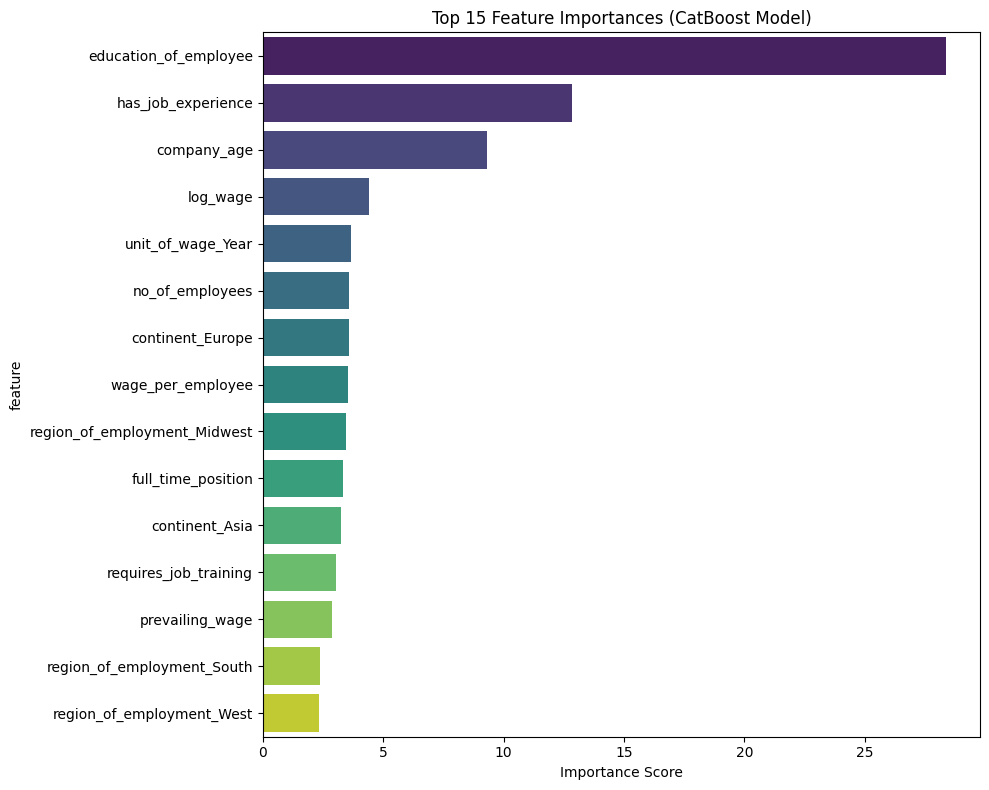

In [111]:
# Get feature names after preprocessing
feature_names = (num_features_opt + 
                 list(preprocessor_opt.named_transformers_['onehot'].get_feature_names_out(oh_encoding_opt)) +
                 or_encoding_opt)

# Train a model to get feature importance
best_model = CatBoostClassifier(verbose=False, random_state=22)
best_model.fit(X_train_resamp_opt, y_train_resamp_opt_encoded)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

# Visualize
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances (CatBoost Model)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()